# Import Libaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder,PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,root_mean_squared_error
from xgboost import XGBRegressor

In [3]:
df = pd.read_csv("Exam_Score_Prediction.csv")
x  =df.iloc[:,:-1]
y =df.iloc[:,-1]

# Splitting Trainning set and Test set

In [4]:
x_train,x_test,y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
Scale_colums = ["age","study_hours","class_attendance","sleep_hours"]
encode_colums = ["gender","course","internet_access","sleep_quality","study_method","facility_rating","exam_difficulty"]
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), encode_colums),("scaler",StandardScaler(),Scale_colums)], remainder="passthrough")
x_train= ct.fit_transform(x_train)
x_test = ct.transform(x_test)

In [5]:
def report(y_true,y_pred):
    return print(f"R2 score:{r2_score(y_true,y_pred)}\nRSME:{root_mean_squared_error(y_true,y_pred)}")

# Linear Regression model

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
lin_y_pred =lin_reg.predict(x_test)
report(y_test,lin_y_pred)


R2 score:0.7401527601962383
RSME:9.65562840837304


# SVR

In [7]:
svm_reg = SVR(kernel='rbf')
svm_reg.fit(x_train,y_train)
svr_y_pred = svm_reg.predict(x_test)

# Decision Tree

In [8]:
dt =DecisionTreeRegressor(random_state=0)
dt.fit(x_train,y_train)
dt_y_pred = dt.predict(x_test)

# Random Forest

In [10]:
rf = RandomForestRegressor(n_estimators=150,random_state=0)
rf.fit(x_train,y_train)
rf_pred =rf.predict(x_test)

# XGBoost

In [11]:
XGB = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=0)
XGB.fit(x_train,y_train)
xg_pred=XGB.predict(x_test)

# Neural Network

In [ ]:
import tensorflow as tf
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(x_train)

nn_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss="mean_squared_error")
history=nn_model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=0,epochs=100)


In [12]:
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

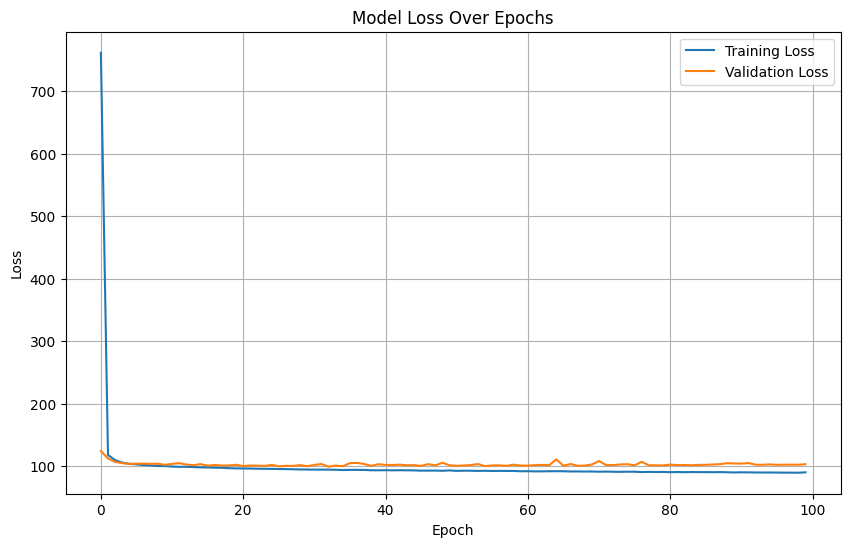

In [ ]:
plot_loss(history)

In [ ]:
nn_y_pred = nn_model.predict(x_test)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step


In [13]:
predictions= [("LinearRegression",lin_y_pred),("SVR",svr_y_pred),("decision Tree",dt_y_pred),("Random Forest",rf_pred),("XGbosst",xg_pred)]

In [14]:
for name, preds in predictions:
    print(f"{name} Report")
    report(y_test, preds)

LinearRegression Report
R2 score:0.7401527601962383
RSME:9.65562840837304
SVR Report
R2 score:0.7290530998906866
RSME:9.859697326904028
decision Tree Report
R2 score:0.41160825006575774
RSME:14.529637432374216
Random Forest Report
R2 score:0.713582383418395
RSME:10.137277918938778
XGbosst Report
R2 score:0.7202469862772152
RSME:10.018642430870393
